# DS 226 Project

## The aim of the project is to build a classification model to predict whether an employee will join or not

### Number of observation: 19158

#### ***********************************************************************************************************************************************************

# Part 1 : importing libraries


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from pandas.api.types import CategoricalDtype
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
import graphviz 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ThresholdedReLU

#  Part 2: Loading the dataset

In [2]:
train_data=pd.read_csv("aug_train.csv")
test_data=pd.read_csv("aug_test.csv")

# Part 3: Summary

In [3]:
train_data.info() # this is will print a brief summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# checking for missing values

In [4]:
# enrollee_id is not required for us which we can remove
data_1=train_data.drop(columns=["enrollee_id"])

In [5]:
# now finding the missing counts
data_1.isnull().sum()/19158*100

city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

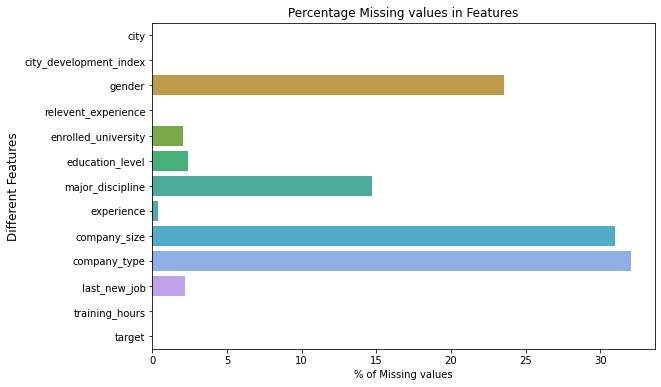

In [6]:
md = (data_1.isnull().sum().to_numpy()/19158)*100
df_mvalues = pd.DataFrame({'Features' : data_1.columns.to_list(), '% of Missing values' : md})  

plt.figure(figsize=(9,6))
sn.barplot(x="% of Missing values", y="Features", data=df_mvalues)
plt.title('Percentage Missing values in Features')
plt.ylabel('Different Features', fontsize=12)
plt.show()

So the columns : gender has 23.5% of missing values, major_discipline has 14.7% of missing values, company size has 31% of missing data, company type has 32% missing data

# Observation

1) 8 columns have missing values. Out of which 4 columns have missing value % quite high. 
For the rest of the columns, we can impute the missing values with mean/median/mode accordingly, but for these 4 columns doing so would introduce bias in the data which may hamper the model building.

2) Also we can not make the missing values as a separate category, especially for gender, because that would 
again introduce bias and is sensitive also.

3) We may drop the rows with missing values , but the disadvantage is that, it would then reduce the 
training data size drastically.

4) So, one option can be to drop the columns full. but for that we need to check whether the columns are significant or not
through visualization and some statistical tests.



# Feature Visualization

#### For city

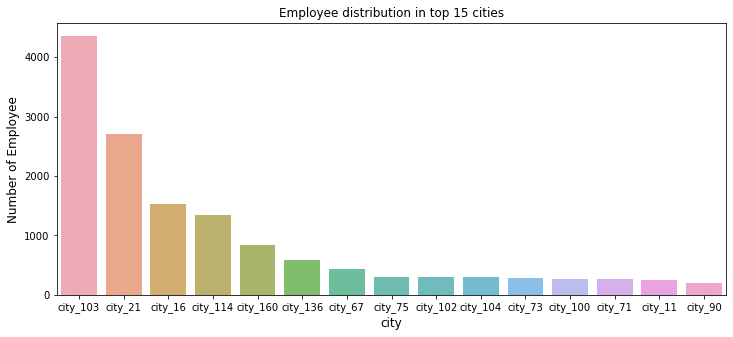

In [7]:
#city 
city_count  = data_1['city'].value_counts()

city_count = city_count[:15,]
plt.figure(figsize=(12,5))
sn.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Employee distribution in top 15 cities')
plt.ylabel('Number of Employee', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

#### City development index

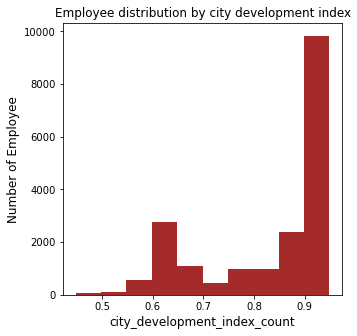

In [8]:
#city development index
plt.figure(figsize=(5,5))
plt.hist(data_1["city_development_index"], color="brown")
plt.title('Employee distribution by city development index')
plt.ylabel('Number of Employee', fontsize=12)
plt.xlabel('city_development_index_count', fontsize=12)
plt.show()

#### Gender

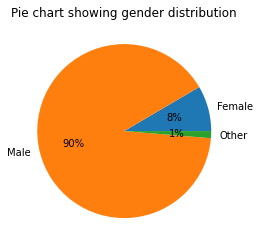

In [9]:
plt.pie(data_1.groupby(["gender"]).size(),labels=['Female','Male','Other'],autopct='%.0f%%',radius=1)
plt.title("Pie chart showing gender distribution")
plt.show()

#### relevant experience

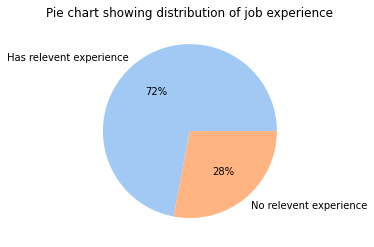

In [10]:
plt.pie(data_1.groupby(["relevent_experience"]).size(),colors=sn.color_palette('pastel')[0:2],labels=['Has relevent experience','No relevent experience'],autopct='%.0f%%',radius=1)
plt.title("Pie chart showing distribution of job experience")
plt.show()

#### enrolled_university

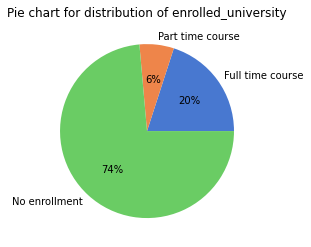

In [11]:
plt.pie(data_1.groupby(["enrolled_university"]).size(),colors=sn.color_palette('muted')[0:3],labels=['Full time course','Part time course','No enrollment'],autopct='%.0f%%',radius=1)
plt.title("Pie chart for distribution of enrolled_university")
plt.show()

#### education level

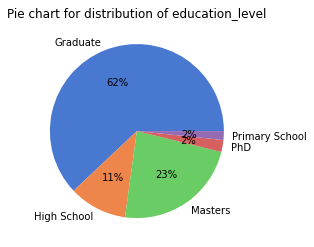

In [12]:
plt.pie(data_1.groupby(["education_level"]).size(),colors=sn.color_palette('muted')[0:6],labels=['Graduate','High School','Masters','PhD','Primary School'],autopct='%.0f%%',radius=1)
plt.title("Pie chart for distribution of education_level")
plt.show()

#### major_discipline

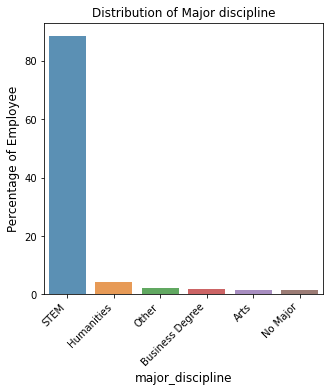

In [13]:
plt.figure(figsize=(5,5))
major_discipline_count  = data_1['major_discipline'].value_counts()
sn.barplot(major_discipline_count.index, major_discipline_count.values/major_discipline_count.sum()*100, alpha=0.8)
plt.title('Distribution of Major discipline')
plt.ylabel('Percentage of Employee', fontsize=12)
plt.xlabel('major_discipline', fontsize=12)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.show()

#### Experience

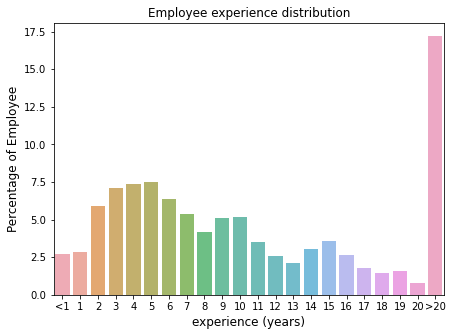

In [14]:
# experience
experience_count  = data_1['experience'].value_counts()
order=["<1","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20",">20"]
plt.figure(figsize=(7,5))
sn.barplot(experience_count.index, experience_count.values/experience_count.sum()*100,order=order, alpha=0.8)
plt.title('Employee experience distribution')
plt.ylabel('Percentage of Employee', fontsize=12)
plt.xlabel('experience (years)', fontsize=12)

plt.show()

#### company_size

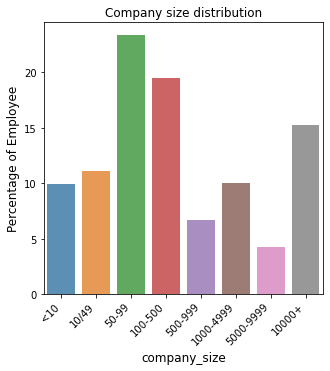

In [15]:
order=["<10","10/49","50-99","100-500","500-999","1000-4999","5000-9999","10000+"]
company_size_count  = data_1['company_size'].value_counts()
plt.figure(figsize=(5,5))
sn.barplot(x = company_size_count.index, y= company_size_count.values/company_size_count.sum()*100,order=order, alpha=0.8)
plt.title('Company size distribution')
plt.ylabel('Percentage of Employee', fontsize=12)
plt.xlabel('company_size', fontsize=12)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.show()

#### company_type

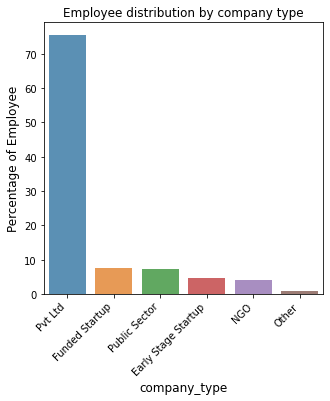

In [16]:
company_type_count  = data_1['company_type'].value_counts()

plt.figure(figsize=(5,5))
sn.barplot(x = company_type_count.index, y= company_type_count.values/company_type_count.sum()*100, alpha=0.8)
plt.title('Employee distribution by company type')
plt.ylabel('Percentage of Employee', fontsize=12)
plt.xlabel('company_type', fontsize=12)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.show()


#### last_new_job

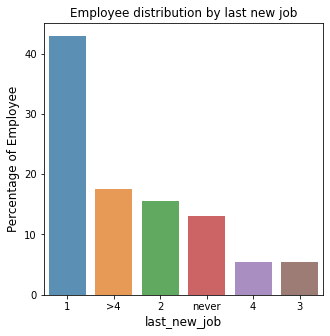

In [17]:
last_new_job_count  = data_1['last_new_job'].value_counts()
order=["never","1","2","3","4",">4"]
plt.figure(figsize=(5,5))
sn.barplot(x = last_new_job_count.index, y= last_new_job_count.values/last_new_job_count.sum()*100, alpha=0.8)
plt.title('Employee distribution by last new job')
plt.ylabel('Percentage of Employee', fontsize=12)
plt.xlabel('last_new_job', fontsize=12)
plt.show()

#### training hours

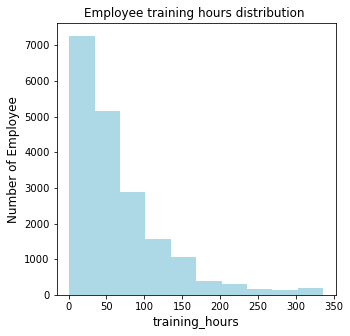

In [18]:
plt.figure(figsize=(5,5))
# sns.barplot(x = training_hours_count.index, y= training_hours_count.values, alpha=0.8)
plt.hist(data_1["training_hours"], color="lightblue")
plt.title('Employee training hours distribution ')
plt.ylabel('Number of Employee', fontsize=12)
plt.xlabel('training_hours', fontsize=12)
plt.show()

# Statistical Analysis

# Chi-sq test to test the association of these columns with target variable

H0: Feature and target variable are independent vs H1: not H0

#### For gender

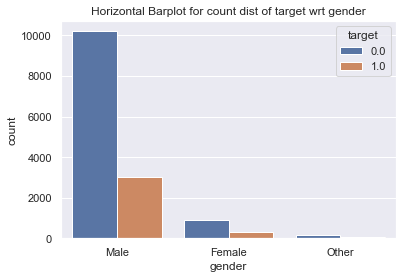

In [19]:
#plot
sn.set_theme(style="darkgrid")
ax=sn.countplot(x="gender",hue="target",data=data_1).set_title("Horizontal Barplot for count dist of target wrt gender")

In [20]:
print(data_1.groupby(["gender","target"]).size())

gender  target
Female  0.0         912
        1.0         326
Male    0.0       10209
        1.0        3012
Other   0.0         141
        1.0          50
dtype: int64


In [21]:
gender_target=[[10209,3012],[912,326],[141,50]]

stat, p, dof, expected = chi2_contingency(gender_target)

In [22]:
if(p<0.01):
    print("gender is associated with target variable")
else:
    print("gender and target variable are independent")

gender and target variable are independent


In [23]:
if(p<0.05):
    print("gender is associated with target variable")
else:
    print("gender and target variable are independent")

gender is associated with target variable


In [24]:
# Cramer's V
gender_cramer=(stat/np.sum(np.array(gender_target)))**0.5
if(gender_cramer<0.1):
    print("There is no or very less association between gender and target variable")
else:
    print("There is association")
gender_cramer

There is no or very less association between gender and target variable


0.02484378736573684

#### For Company_size

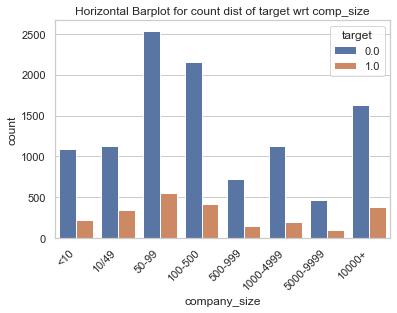

In [25]:
##
order=["<10","10/49","50-99","100-500","500-999","1000-4999","5000-9999","10000+"]
sn.set_theme(style="whitegrid")
ax=sn.countplot(x="company_size",hue="target",data=data_1,order=order).set_title("Horizontal Barplot for count dist of target wrt comp_size")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.show()

In [26]:
print(data_1.groupby(["company_size","target"]).size())

company_size  target
10/49         0.0       1127
              1.0        344
100-500       0.0       2156
              1.0        415
1000-4999     0.0       1128
              1.0        200
10000+        0.0       1634
              1.0        385
50-99         0.0       2538
              1.0        545
500-999       0.0        725
              1.0        152
5000-9999     0.0        461
              1.0        102
<10           0.0       1084
              1.0        224
dtype: int64


In [27]:
company_size_target=[[1127,344],[2156,415],[1128,200],[1634,385],[2538,545],[725,152],[461,102],[1084,224]]

stat, p, dof, expected = chi2_contingency(company_size_target)

In [28]:
if(p<0.01):
    print("company_size is associated with target variable")
else:
    print("company_size and target variable are independent")

company_size is associated with target variable


In [29]:
# Cramer's V
comp_size_cramer=(stat/np.sum(np.array(company_size_target)))**0.5
if(comp_size_cramer<0.1):
    print("There is no or very less association between company_size and target variable")
else:
    print("There is association")
comp_size_cramer

There is no or very less association between company_size and target variable


0.058686940466582654

#### For company_type

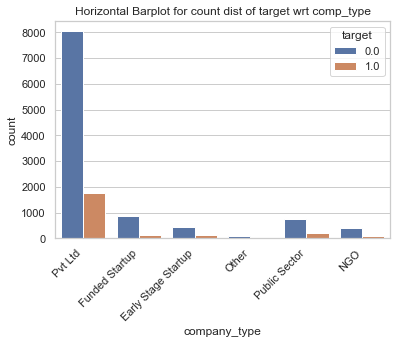

In [30]:
# some plots
sn.set_theme(style="whitegrid")
ax=sn.countplot(x="company_type",hue="target",data=data_1).set_title("Horizontal Barplot for count dist of target wrt comp_type")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.show()

In [31]:
print(data_1.groupby(["company_type","target"]).size())

company_type         target
Early Stage Startup  0.0        461
                     1.0        142
Funded Startup       0.0        861
                     1.0        140
NGO                  0.0        424
                     1.0         97
Other                0.0         92
                     1.0         29
Public Sector        0.0        745
                     1.0        210
Pvt Ltd              0.0       8042
                     1.0       1775
dtype: int64


In [32]:
company_type_target=[[461,142],[861,140],[424,97],[92,29],[745,210],[8042,1775]]

stat, p, dof, expected = chi2_contingency(company_type_target)

In [33]:
if(p<0.01):
    print("company_type is associated with target variable")
else:
    print("company_type and target variable are independent")

company_type is associated with target variable


In [34]:
# Cramer's V
comp_type_cramer=(stat/np.sum(np.array(company_type_target)))**0.5
if(comp_type_cramer<0.1):
    print("There is no or very less association between company_type and target variable")
else:
    print("There is association")
comp_type_cramer

There is no or very less association between company_type and target variable


0.05187783866420968

#### For major_discipline

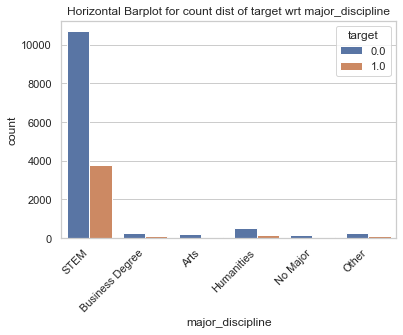

In [35]:
# some plots
sn.set_theme(style="whitegrid")
ax=sn.countplot(x="major_discipline",hue="target",data=data_1).set_title("Horizontal Barplot for count dist of target wrt major_discipline")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.show()

In [36]:
print(data_1.groupby(["major_discipline","target"]).size())

major_discipline  target
Arts              0.0         200
                  1.0          53
Business Degree   0.0         241
                  1.0          86
Humanities        0.0         528
                  1.0         141
No Major          0.0         168
                  1.0          55
Other             0.0         279
                  1.0         102
STEM              0.0       10701
                  1.0        3791
dtype: int64


In [37]:
major_target=[[200,53],[241,86],[528,141],[168,55],[279,102],[10701,3791]]

stat, p, dof, expected = chi2_contingency(major_target)

In [38]:
if(p<0.01):
    print("major_discipline is associated with target variable")
else:
    print("major_discipline and target variable are independent")

major_discipline and target variable are independent


In [39]:
if(p<0.05):
    print("major_discipline is associated with target variable")
else:
    print("major_discipline and target variable are independent")

major_discipline is associated with target variable


In [40]:
# Cramer's V
major_cramer=(stat/np.sum(np.array(major_target)))**0.5
if(major_cramer<0.1):
    print("There is no or very less association between major_discipline and target variable")
else:
    print("There is association")
major_cramer

There is no or very less association between major_discipline and target variable


0.02732839733526265

# Conclusion

### Should not drop the whole columns.

### Also dropping rows will reduce the train data size

## Therefore,
1. for these 4 columns, make the missing values as separate category as "unknown"
2. for other columns impute by mean/median/mode whichever applicable

# Missing Value Imputation

1. gender to be imputed by unknown (this will give another aspect that if someone does not want to disclose their gender, then also the model will be valid)
2. enrolled_university to be imputed by mode
3. education level to be imputed by median
4. major_discipline to be imputed by unknown
5. experience to be imputed by median
6. company_size to be imputed by unknown
7. company_type to be imputed by unknown
8. last new job to be imputed by median

In [41]:
# imputation of the columns with unknown, this is easy
data_1['gender'].fillna('Unknown',inplace=True)
data_1['major_discipline'].fillna('Unknown',inplace=True)
data_1['company_size'].fillna('Unknown',inplace=True)
data_1['company_type'].fillna('Unknown',inplace=True)

In [42]:
# imputation with mode: also easy
data_1['enrolled_university'].fillna(data_1['enrolled_university'].value_counts().index[0],inplace=True)

In [43]:
# these are ordinal variable, hence should take the median than mode
xx=data_1['education_level'].dropna()
xx.unique()
education_level_order=CategoricalDtype(['Primary School', 'High School','Graduate','Masters','Phd'],ordered=True)
xx=xx.astype(education_level_order)
xx1=np.array(xx.sort_values())
data_1['education_level'].fillna(xx1[int(len(xx1)/2)],inplace=True)

In [44]:
xx=data_1['experience'].dropna()
xx.unique()
experience_order=CategoricalDtype(['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21'],ordered=True)
xx=xx.astype(experience_order)
xx1=np.array(xx.sort_values())
data_1['experience'].fillna(xx1[int(len(xx1)/2)],inplace=True)

In [45]:
xx=data_1['last_new_job'].dropna()
xx.unique()
new_job_order=CategoricalDtype(['never','1','2','3','4','>4'],ordered=True)
xx=xx.astype(new_job_order)
xx1=np.array(xx.sort_values())
data_1['last_new_job'].fillna(xx1[int(len(xx1)/2)],inplace=True)

#### Final Check

In [46]:
data_1.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Feature selection

### We are not performing any feature selection as most are categorical data, 
### for numerical variables correlation is calculated and is insignificant

In [47]:
data_1[['city_development_index','training_hours']].corr()

,city_development_index,training_hours
city_development_index,1.00000,0.00192
training_hours,0.00192,1.00000


# Notes : If time permits, we can check for outlier detection, but multivariate outlier detection that too in mixed data is itself challenging. So skipping for the time being

## Modelling:
#### data_1 is now the final training dataset to do modelling

###### split up modelling among Joy, Aladin and Shaurya. Joy is taking logistic,cauchy, laplace. Aladin and shaurya will choose accordingly. Plan is to do Logistic, Decision Tree, Random forest, ANN. What do you say about naive bayes,SVM and Xgboost?

Joy is keeping train validation ratio as 80-20

In [48]:
data_1.columns
# city -- nominal : onehotencoder
# city_development_index -- numeric : keep as it is
# gender -- nominal : onehotencoder
# relevent_experience -- ordinal : Ordinalencoder
# enrolled_univeristy -- ordinal : Ordinalencoder
# education_level -- ordinal : Ordinalencoder
# major_discipline -- nominal : onehotencoder
# experience -- ordinal : Ordinalencoder
# company_size -- ordinal : Ordinalencoder (keep unknown as least preference)
# company_type -- nominal : onehotencoder
# last_new_job -- ordinal :Ordinalencoder (check the order used during missing value imputation)
# training_hours -- numeric : keep as it is

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [49]:
nominal_variables=['gender','city','major_discipline','company_type','enrolled_university']
ordinal_variables=['relevent_experience','education_level','experience','company_size','last_new_job']

In [50]:
category_ordinal=[['No relevent experience','Has relevent experience'],
          ['Primary School','High School','Graduate','Masters','Phd'],
          ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20'],
          ['Unknown','<10','10/49','50-99','100-500','500-999','1000-4999','5000-9999','10000+'],
          ['never','1','2','3','4','>4']]

In [51]:
ord_enc=OrdinalEncoder(categories=category_ordinal)
data_2=ord_enc.fit_transform(data_1[ordinal_variables])

In [52]:
data_3=pd.DataFrame(data_2,columns=ordinal_variables)

In [53]:
ohc_enc=OneHotEncoder(sparse=False,drop='first')
for col in nominal_variables:
    output= pd.DataFrame(ohc_enc.fit_transform(data_1[[col]]))
    output.columns= ohc_enc.get_feature_names([col])
    data_3=pd.concat([data_3,output],axis=1)

In [54]:
data_3=pd.concat([data_3,data_1['city_development_index'],data_1['training_hours'],data_1['target']],axis=1)

In [55]:
data_3

,relevent_experience,education_level,experience,company_size,last_new_job,gender_Male,gender_Other,gender_Unknown,city_city_10,city_city_100,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown,enrolled_university_Part time course,enrolled_university_no_enrollment,city_development_index,training_hours,target
0,1.0,2.0,21.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.920,36,1.0
1,0.0,2.0,15.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.776,47,0.0
2,0.0,2.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.624,83,0.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.789,52,1.0
4,1.0,3.0,21.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.767,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.0,2.0,14.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.878,42,1.0
19154,1.0,2.0,14.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.920,52,1.0
19155,1.0,2.0,21.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.920,44,0.0
19156,1.0,1.0,0.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.802,97,0.0


## data_3 is absolutely ready for modelling

#### PS: Data is imbalanced, first work with that. if result is not satisfactory, then we will apply upsampling

In [56]:
# train-validation-split
X=data_3.loc[:,data_3.columns!='target']
y=data_3['target']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=60)

In [57]:
LR=LogisticRegression()

In [58]:
LR.fit(X_train,y_train)
pred_LR_valid=LR.predict(X_validation)
pred_LR_train=LR.predict(X_train)

In [59]:
print(f"training accuracy is {LR.score(X_train,y_train)}")  #training accuracy
print(f"validation accuracy is {LR.score(X_validation,y_validation)}")
print(f"training f1 score is {f1_score(y_train,pred_LR_train)}")
print(f"validation f1 score is {f1_score(y_validation,pred_LR_valid)}")
print(f"training roc auc score is {roc_auc_score(y_train,pred_LR_train)}")
print(f"validation roc auc score is {roc_auc_score(y_validation,pred_LR_valid)}")


training accuracy is 0.7758058201748662
validation accuracy is 0.7813152400835073
training f1 score is 0.42561016382480776
validation f1 score is 0.41643454038997213
training roc auc score is 0.6278738717487792
validation roc auc score is 0.6252957758070822


In [60]:
tst=[]
trn=[]
f1_tst=[]
f1_tr=[]
X_test=X_validation
y_test=y_validation
for i in range(1,20):
    clf_p = DecisionTreeClassifier(max_depth=i)
    clf_p = clf_p.fit(X_train, y_train)
    y_pred_test=clf_p.predict(X_test)
    print(i)
    print(confusion_matrix(y_pred_test,y_test), accuracy_score(y_pred_test,y_test), roc_auc_score(y_pred_test,y_test),f1_score(y_pred_test,y_test))
    tst.append(accuracy_score(y_pred_test,y_test))
    f1_tst.append(f1_score(y_pred_test,y_test))
    y_pred_train=clf_p.predict(X_train)
    print(confusion_matrix(y_pred_train,y_train),accuracy_score(y_pred_train,y_train), roc_auc_score(y_pred_train,y_train),f1_score(y_pred_train,y_train))
    trn.append(accuracy_score(y_pred_train,y_train))
    f1_tr.append(f1_score(y_pred_train,y_train))
    


1
[[2625  539]
 [ 290  378]] 0.7836638830897703 0.6977571405860845 0.4769716088328076
[[10346  2221]
 [ 1120  1639]] 0.7820044369046065 0.7086615523324881 0.49524097295663994
2
[[2625  539]
 [ 290  378]] 0.7836638830897703 0.6977571405860845 0.4769716088328076
[[10346  2221]
 [ 1120  1639]] 0.7820044369046065 0.7086615523324881 0.49524097295663994
3
[[2628  539]
 [ 287  378]] 0.784446764091858 0.6991142206637528 0.4778761061946903
[[10362  2229]
 [ 1104  1631]] 0.7825264256818478 0.709656240049587 0.4946171341925701
4
[[2541  421]
 [ 374  496]] 0.7925365344467641 0.713990624539182 0.5551203133743705
[[10050  1800]
 [ 1416  2060]] 0.7901605115490017 0.720368239355581 0.5616139585605235
5
[[2560  424]
 [ 355  493]] 0.7967118997912317 0.7196383858566442 0.5586402266288951
[[10111  1814]
 [ 1355  2046]] 0.7932271956152943 0.7247351839420765 0.563558738465776
6
[[2514  390]
 [ 401  527]] 0.793580375782881 0.7167952051866628 0.5712737127371275
[[10018  1562]
 [ 1448  2298]] 0.803601722562964

In [61]:
clf_p = DecisionTreeClassifier(max_depth=30)
clf_p = clf_p.fit(X_train, y_train)
y_pred_test=clf_p.predict(X_test)
print(i)
print(confusion_matrix(y_pred_test,y_test), accuracy_score(y_pred_test,y_test), roc_auc_score(y_pred_test,y_test),f1_score(y_pred_test,y_test))
tst.append(accuracy_score(y_pred_test,y_test))
f1_tst.append(f1_score(y_pred_test,y_test))
y_pred_train=clf_p.predict(X_train)
print(confusion_matrix(y_pred_train,y_train),accuracy_score(y_pred_train,y_train), roc_auc_score(y_pred_train,y_train),f1_score(y_pred_train,y_train))
trn.append(accuracy_score(y_pred_train,y_train))
f1_tr.append(f1_score(y_pred_train,y_train))
    

19
[[2376  495]
 [ 539  422]] 0.7301670146137788 0.6333560587032185 0.4494142705005325
[[11427   116]
 [   39  3744]] 0.98988646744095 0.9898206705362558 0.9797200052335471


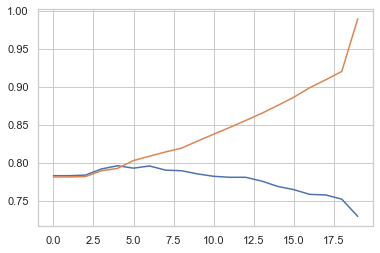

In [62]:
plt.plot(tst)
plt.plot(trn)

Text(0.5, 1.0, 'Decision Tree Model')

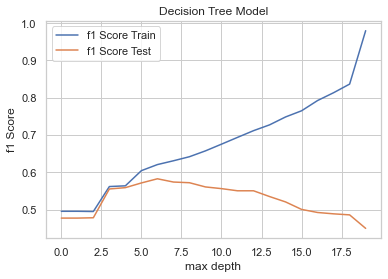

In [63]:
plt.plot(f1_tr,label='f1 Score Train')
plt.plot(f1_tst,label='f1 Score Test')
plt.legend()
plt.ylabel('f1 Score')
plt.xlabel('max depth')
plt.title('Decision Tree Model')

In [64]:
# from the above graph and the data it is clear that the best model is one at depth =4

In [65]:
dot_data = tree.export_graphviz(clf_p, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=['no','yes'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('AIML_final_1')

'AIML_final_1.pdf'

In [66]:
'''Takes quite a while to execute'''
tst=[]
trn=[]
auc_t=[]
auc_v=[]
f1_t=[]
f1_v=[]
for i in range(1,50):
    rfc=RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred_train=rfc.predict(X_train)
    y_pred_test=rfc.predict(X_test)
    print(i)
    print(f"training accuracy is {rfc.score(X_train,y_train)}")  #training accuracy
    trn.append(rfc.score(X_train,y_train))
    print(f"validation accuracy is {rfc.score(X_validation,y_validation)}")
    tst.append(rfc.score(X_validation,y_validation))
    print(f"training f1 score is {f1_score(y_train,y_pred_train)}")
    f1_t.append(f1_score(y_train,y_pred_train))
    print(f"validation f1 score is {f1_score(y_validation,y_pred_test)}")
    f1_v.append(f1_score(y_validation,y_pred_test))
    print(f"training roc auc score is {roc_auc_score(y_train,y_pred_train)}")
    auc_t.append(roc_auc_score(y_train,y_pred_train))
    print(f"validation roc auc score is {roc_auc_score(y_validation,y_pred_test)}")
    auc_v.append(roc_auc_score(y_validation,y_pred_test))

1
training accuracy is 0.7481404149810779
validation accuracy is 0.7606993736951984
training f1 score is 0.0
validation f1 score is 0.0
training roc auc score is 0.5
validation roc auc score is 0.5
2
training accuracy is 0.7481404149810779
validation accuracy is 0.7606993736951984
training f1 score is 0.0
validation f1 score is 0.0
training roc auc score is 0.5
validation roc auc score is 0.5
3
training accuracy is 0.7481404149810779
validation accuracy is 0.7606993736951984
training f1 score is 0.0
validation f1 score is 0.0
training roc auc score is 0.5
validation roc auc score is 0.5
4
training accuracy is 0.7486624037583192
validation accuracy is 0.7609603340292276
training f1 score is 0.007727975270479134
validation f1 score is 0.006507592190889371
training roc auc score is 0.5016377548760969
validation roc auc score is 0.5012927156380995
5
training accuracy is 0.7544042803079734
validation accuracy is 0.7643528183716075
training f1 score is 0.09822712026832774
validation f1 score

34
training accuracy is 0.9790552003131933
validation accuracy is 0.7862734864300627
training f1 score is 0.9567210462451126
validation f1 score is 0.5185185185185185
training roc auc score is 0.9591930275498003
validation roc auc score is 0.6816243960561978
35
training accuracy is 0.9827091217538823
validation accuracy is 0.7828810020876826
training f1 score is 0.9645484949832775
validation f1 score is 0.5117370892018778
training roc auc score is 0.9665328400524551
validation roc auc score is 0.6775259020109949
36
training accuracy is 0.9844708338770717
validation accuracy is 0.784446764091858
training f1 score is 0.96825820218725
validation f1 score is 0.5146886016451233
training roc auc score is 0.9698583963942957
validation roc auc score is 0.6793025208983727
37
training accuracy is 0.9868197833746575
validation accuracy is 0.7888830897703549
training f1 score is 0.9731739707835325
validation f1 score is 0.5193107546048723
training roc auc score is 0.9743497558449447
validation roc

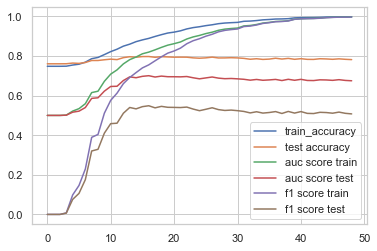

In [67]:
plt.plot(trn,label='train_accuracy')
plt.plot(tst,label= 'test accuracy')
plt.plot(auc_t,label='auc score train')
plt.plot(auc_v,label='auc score test')
plt.plot(f1_t,label='f1 score train')
plt.plot(f1_v, label='f1 score test')
plt.legend()

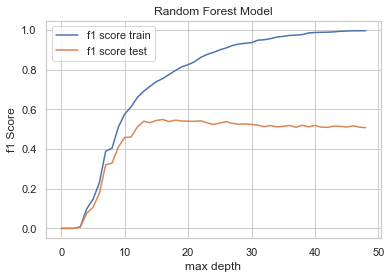

In [68]:
#plt.plot(trn,label='train_accuracy')
#plt.plot(tst,label= 'test accuracy')
#plt.plot(auc_t,label='auc score train')
#plt.plot(auc_v,label='auc score test')
plt.plot(f1_t,label='f1 score train')
plt.plot(f1_v, label='f1 score test')
plt.xlabel('max depth')
plt.ylabel('f1 Score')
plt.title('Random Forest Model')
plt.legend()

In [69]:
auc_v.index(max(auc_v))+1

17

In [76]:
rfc=RandomForestClassifier(max_depth=17, random_state=0)
rfc.fit(X_train, y_train)
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

print(f"training accuracy is {rfc.score(X_train,y_train)}")  #training accuracy
#trn.append(rfc.score(X_train,y_train))
print(f"validation accuracy is {rfc.score(X_validation,y_validation)}")
#tst.append(rfc.score(X_validation,y_validation))
print(f"training f1 score is {f1_score(y_train,y_pred_train)}")
#f1_t.append(f1_score(y_train,y_pred_train))
print(f"validation f1 score is {f1_score(y_validation,y_pred_test)}")
#f1_v.append(f1_score(y_validation,y_pred_test))
print(f"training roc auc score is {roc_auc_score(y_train,y_pred_train)}")
#auc_t.append(roc_auc_score(y_train,y_pred_train))
print(f"validation roc auc score is {roc_auc_score(y_validation,y_pred_test)}")
#auc_v.append(roc_auc_score(y_validation,y_pred_test))

training accuracy is 0.8890121362390708
validation accuracy is 0.7974947807933194
training f1 score is 0.755287009063444
validation f1 score is 0.5488372093023255
training roc auc score is 0.8197049578433738
validation roc auc score is 0.7005856594795095


In [71]:
print(f"training accuracy is {rfc.score(X_train,y_train)}")  #training accuracy
print(f"validation accuracy is {rfc.score(X_validation,y_validation)}")
print(f"training f1 score is {f1_score(y_train,y_pred_train)}")
print(f"validation f1 score is {f1_score(y_validation,y_pred_test)}")
print(f"training roc auc score is {roc_auc_score(y_train,y_pred_train)}")
print(f"validation roc auc score is {roc_auc_score(y_validation,y_pred_test)}")

training accuracy is 0.8890121362390708
validation accuracy is 0.7974947807933194
training f1 score is 0.755287009063444
validation f1 score is 0.5488372093023255
training roc auc score is 0.8197049578433738
validation roc auc score is 0.7005856594795095


In [72]:
# Adaboost

In [73]:
abc = AdaBoostClassifier(n_estimators=10000, random_state=0)
abc.fit(X_train, y_train)
y_pred_train=abc.predict(X_train)
y_pred_test=abc.predict(X_test)

KeyboardInterrupt: 

In [ ]:
print(f"training accuracy is {abc.score(X_train,y_train)}")  #training accuracy
print(f"validation accuracy is {abc.score(X_validation,y_validation)}")
print(f"training f1 score is {f1_score(y_train,y_pred_train)}")
print(f"validation f1 score is {f1_score(y_test,y_pred_test)}")
print(f"training roc auc score is {roc_auc_score(y_train,y_pred_train)}")
print(f"validation roc auc score is {roc_auc_score(y_test,y_pred_test)}")

In [ ]:
for i in range(1,1000,100):
    abc = AdaBoostClassifier(n_estimators=i, random_state=0)
    abc.fit(X_train, y_train)
    y_pred_train=abc.predict(X_train)
    y_pred_test=abc.predict(X_test)
    print("no of models is ",i)
    print(f"training accuracy is {abc.score(X_train,y_train)}")  #training accuracy
    print(f"validation accuracy is {abc.score(X_validation,y_validation)}")
    print(f"training f1 score is {f1_score(y_train,y_pred_train)}")
    print(f"validation f1 score is {f1_score(y_test,y_pred_test)}")
    print(f"training roc auc score is {roc_auc_score(y_train,y_pred_train)}")
    print(f"validation roc auc score is {roc_auc_score(y_test,y_pred_test)}")

In [ ]:
#DL

In [ ]:
model = Sequential()
norm = tf.keras.layers.LayerNormalization(
    epsilon=0.001,
    center=True,
    scale=True
)
model.add(norm)
model.add(ThresholdedReLU(theta=10)) # Theta is a threshold which determines the output result of a particular neuron.
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,
          epochs=20)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
model.metrics_names

In [ ]:
data_3['target'].value_counts()

In [74]:
try_test=pd.read_csv('transformed_test_data.csv')
try_test=try_test.dropna()
try_test=try_test.drop(columns='Unnamed: 0')
try_test

,relevent_experience,education_level,experience,company_size,last_new_job,gender_Male,gender_Other,gender_Unknown,city_city_10,city_city_100,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown,enrolled_university_Part time course,enrolled_university_no_enrollment,city_development_index,training_hours
0,1.0,2.0,9.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.827,21.0
1,1.0,2.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.920,98.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.624,15.0
3,1.0,3.0,11.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.827,39.0
4,1.0,2.0,21.0,8.0,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.920,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.0,2.0,16.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.920,15.0
2125,1.0,3.0,18.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.897,30.0
2126,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.887,18.0
2127,1.0,1.0,7.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.804,84.0


In [75]:
answers = np.load('jobchange_test_target_values.npy')
answers

array([1., 0., 1., ..., 0., 0., 0.])

In [78]:
y_pred_test=rfc.predict(try_test)
print(f"test accuracy final accuracy is {rfc.score(try_test,answers)}")  #training accuracy

print(f"test accuracy final f1 score is {f1_score(answers,y_pred_test)}")



test accuracy final accuracy is 0.7440112728980742
test accuracy final f1 score is 0.2377622377622378


In [ ]:
data_target_1=data_3[data_3['target']==1]

# STARTING THE SUPER SAMPLING

In [ ]:
data_supersampled=data_3.copy()

In [ ]:
data_supersampled

In [ ]:
for row,column in data_target_1.iterrows():
    #print(column)
    data_supersampled=data_supersampled.append(column)

In [ ]:
data_supersampled=data_supersampled.reset_index()

In [ ]:
data_supersampled

In [ ]:
data_supersampled['target'].value_counts()

In [ ]:
data_supersampled=data_supersampled.drop(columns='index')

In [ ]:
data_supersampled

In [ ]:
# train-validation-split
X_u=data_supersampled.loc[:,data_supersampled.columns!='target']
y_u=data_supersampled['target']

X_train_u, X_validation_u, y_train_u, y_validation_u = train_test_split(X_u, y_u, test_size=0.20, random_state=60)

In [ ]:
LR_u=LogisticRegression()

In [ ]:
LR_u.fit(X_train_u,y_train_u)
pred_LR_valid_u=LR.predict(X_validation_u)
pred_LR_train_u=LR.predict(X_train_u)

In [ ]:
print(f"training accuracy is {LR.score(X_train_u,y_train_u)}")  #training accuracy
print(f"validation accuracy is {LR.score(X_validation_u,y_validation_u)}")
print(f"training f1 score is {f1_score(y_train_u,pred_LR_train_u)}")
print(f"validation f1 score is {f1_score(y_validation_u,pred_LR_valid_u)}")
print(f"training roc auc score is {roc_auc_score(y_train_u,pred_LR_train_u)}")
print(f"validation roc auc score is {roc_auc_score(y_validation_u,pred_LR_valid_u)}")

In [ ]:
tst=[]
trn=[]
X_test_u=X_validation_u
y_test_u=y_validation_u
for i in range(1,1000):
    clf_p = DecisionTreeClassifier(max_depth=i)
    clf_p = clf_p.fit(X_train_u, y_train_u)
    y_pred_test_u=clf_p.predict(X_test_u)
    print(i)
    print(f1_score(y_pred_test_u,y_test_u))
    tst.append(f1_score(y_pred_test_u,y_test_u))
    y_pred_train_u=clf_p.predict(X_train_u)
    print(f1_score(y_pred_train_u,y_train_u))
    trn.append(f1_score(y_pred_train_u,y_train_u))

In [ ]:
plt.plot(tst)
plt.plot(trn)

In [ ]:
dot_data = tree.export_graphviz(clf_p, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=['no','yes'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('AIML_final_1_super_sampled')

In [ ]:
'''Takes quite a while to execute'''
tst=[]
trn=[]
auc_t=[]
auc_v=[]
f1_t=[]
f1_v=[]
for i in range(1,90):
    rfc=RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(X_train_u, y_train_u)
    y_pred_train=rfc.predict(X_train_u)
    y_pred_test=rfc.predict(X_test_u)
    print(f"training f1 score is {f1_score(y_train_u,y_pred_train)}")
    f1_t.append(f1_score(y_train_u,y_pred_train))
    print(f"validation f1 score is {f1_score(y_validation_u,y_pred_test)}")
    f1_v.append(f1_score(y_validation_u,y_pred_test))

In [ ]:

plt.plot(f1_t,label='f1 score train')
plt.plot(f1_v, label='f1 score test')

plt.legend()

In [ ]:
rfc=RandomForestClassifier(max_depth=17, random_state=0)
rfc.fit(X_train, y_train)
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

print(f"training accuracy is {rfc.score(X_train,y_train)}")  #training accuracy
#trn.append(rfc.score(X_train,y_train))
print(f"validation accuracy is {rfc.score(X_validation,y_validation)}")
#tst.append(rfc.score(X_validation,y_validation))
print(f"training f1 score is {f1_score(y_train,y_pred_train)}")
#f1_t.append(f1_score(y_train,y_pred_train))
print(f"validation f1 score is {f1_score(y_validation,y_pred_test)}")
#f1_v.append(f1_score(y_validation,y_pred_test))
print(f"training roc auc score is {roc_auc_score(y_train,y_pred_train)}")
#auc_t.append(roc_auc_score(y_train,y_pred_train))
print(f"validation roc auc score is {roc_auc_score(y_validation,y_pred_test)}")
#auc_v.append(roc_auc_score(y_validation,y_pred_test))

In [ ]:
print(f"training accuracy is {rfc.score(X_train,y_train)}")  #training accuracy
print(f"validation accuracy is {rfc.score(X_validation,y_validation)}")
print(f"training f1 score is {f1_score(y_train,y_pred_train)}")
print(f"validation f1 score is {f1_score(y_validation,y_pred_test)}")
print(f"training roc auc score is {roc_auc_score(y_train,y_pred_train)}")
print(f"validation roc auc score is {roc_auc_score(y_validation,y_pred_test)}")

In [ ]:
abc = AdaBoostClassifier(n_estimators=1000, random_state=0)
abc.fit(X_train, y_train)
y_pred_train=abc.predict(X_train)
y_pred_test=abc.predict(X_test)

In [ ]:
print(f"training accuracy is {abc.score(X_train,y_train)}")  #training accuracy
print(f"validation accuracy is {abc.score(X_validation,y_validation)}")
print(f"training f1 score is {f1_score(y_train,y_pred_train)}")
print(f"validation f1 score is {f1_score(y_test,y_pred_test)}")
print(f"training roc auc score is {roc_auc_score(y_train,y_pred_train)}")
print(f"validation roc auc score is {roc_auc_score(y_test,y_pred_test)}")

In [ ]:
model = Sequential()
norm = tf.keras.layers.LayerNormalization(
    epsilon=0.001,
    center=True,
    scale=True
)
model.add(norm)
model.add(ThresholdedReLU(theta=10)) # Theta is a threshold which determines the output result of a particular neuron.
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,
          epochs=100)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
try_test=pd.read_csv('transformed_test_data.csv')

In [ ]:
try_test=try_test.dropna()
try_test=try_test.drop(columns='Unnamed: 0')
try_test

In [ ]:
answers = np.load('jobchange_test_target_values.npy')
answers

In [ ]:

trn=[]

auc_v=[]

f1_v=[]
for i in range(1,90):
    rfc=RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred_test=rfc.predict(try_test)
    print(i)
    print(f"validation accuracy is {rfc.score(try_test,answers)}")
    trn.append(rfc.score(try_test,answers))
    print(f"validation f1 score is {f1_score(answers,y_pred_test)}")
    auc_v.append(f1_score(answers,y_pred_test))
    print(f"validation roc auc score is {roc_auc_score(answers,y_pred_test)}")
    f1_v.append(roc_auc_score(answers,y_pred_test))

In [ ]:
plt.plot(trn,label='train_accuracy')
plt.plot(tst,label= 'test accuracy')
plt.plot(auc_t,label='auc score train')
plt.plot(auc_v,label='auc score test')
plt.plot(f1_t,label='f1 score train')
plt.plot(f1_v, label='f1 score test')
plt.legend()

In [ ]:
X_train

In [ ]:
try_test